In [57]:
import numpy as np
import pandas as pd
import torch
from sklearn.preprocessing import StandardScaler
import torch
import torch.optim as optim
import matplotlib.pyplot as plt


In [58]:
from google.colab import drive
drive.mount ('/content/drive')

file_path = '/content/drive/My Drive/Intro to ML/Housing.csv'
housing = pd.DataFrame(pd.read_csv(file_path))
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)
housing.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


Seperating Dataset

In [59]:
inputVariables = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
x = housing[inputVariables].values
y = housing['price'].values
scaledXValues = StandardScaler().fit_transform(x)
scaledYValues = StandardScaler().fit_transform(y.reshape(-1,1)).flatten()

In [60]:
t_x = torch.tensor(scaledXValues)
t_y = torch.tensor(scaledYValues)

2a. Develop preprocessing and a training loop to train a linear regression model

In [61]:
n_samples = t_x.shape[0]
n_val = int (0.2 * n_samples)

shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices [:-n_val]
val_indices = shuffled_indices[-n_val:]

train_t_x = t_x[train_indices]
train_t_y = t_y[train_indices]

val_t_x = t_x[val_indices]
val_t_y = t_y[val_indices]

In [62]:
def linearModel (t_x, w5, w4, w3, w2, w1, b):
 return torch.matmul(t_x, params[:-1].double()) + params[-1].double()

In [63]:
def loss(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()


In [64]:
def linearTrainingLoop(n_epochs, optimizer, params, train_t_x, val_t_x, train_t_y, val_t_y):
  trainLosses = []
  validLosses = []

  for epoch in range (1, n_epochs + 1):
    train_t_p = linearModel(train_t_x, *params)
    train_loss = loss(train_t_p, train_t_y)

    val_t_p = linearModel(val_t_x, *params)
    val_loss = loss(val_t_p, val_t_y)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    trainLosses.append(train_loss)
    validLosses.append(val_loss)


    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss:.6f}, \tValidation Loss: {val_loss:.6f}\n')
  return params, trainLosses, validLosses



2b. SGD

Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss and validation accuracy for every 500 epochs per training.

In [65]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.1)
print('Learning rate of 0.1')
model1, trainLoss1, validLoss1  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss1])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss1])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 1000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 1500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 2000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 2500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 3000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 3500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 4000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 4500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 5000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453



In [66]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.01)
print('Learning rate of 0.01')
model2, trainLoss2, validLoss2  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss2])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss2])


Learning rate of 0.01
Epochs: 500, 	Training Loss: 0.424326, 	Validation Loss: 0.499400

Epochs: 1000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 1500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 2000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 2500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 3000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 3500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 4000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 4500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 5000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453



In [67]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.SGD([params], lr=0.001)
print('Learning rate of 0.001')
model3, trainLoss3, validLoss3  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss3])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss3])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 0.570490, 	Validation Loss: 0.591738

Epochs: 1000, 	Training Loss: 0.432217, 	Validation Loss: 0.487562

Epochs: 1500, 	Training Loss: 0.425686, 	Validation Loss: 0.493305

Epochs: 2000, 	Training Loss: 0.424670, 	Validation Loss: 0.496477

Epochs: 2500, 	Training Loss: 0.424418, 	Validation Loss: 0.497947

Epochs: 3000, 	Training Loss: 0.424350, 	Validation Loss: 0.498680

Epochs: 3500, 	Training Loss: 0.424332, 	Validation Loss: 0.499054

Epochs: 4000, 	Training Loss: 0.424327, 	Validation Loss: 0.499247

Epochs: 4500, 	Training Loss: 0.424326, 	Validation Loss: 0.499347

Epochs: 5000, 	Training Loss: 0.424326, 	Validation Loss: 0.499398



In [68]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.0001)
print('Learning rate of 0.0001')
model4, trainLoss4, validLoss4  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss4])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss4])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 4.254433, 	Validation Loss: 4.479959

Epochs: 1000, 	Training Loss: 3.063454, 	Validation Loss: 3.200976

Epochs: 1500, 	Training Loss: 2.245216, 	Validation Loss: 2.327366

Epochs: 2000, 	Training Loss: 1.682731, 	Validation Loss: 1.731284

Epochs: 2500, 	Training Loss: 1.295770, 	Validation Loss: 1.325117

Epochs: 3000, 	Training Loss: 1.029322, 	Validation Loss: 1.048850

Epochs: 3500, 	Training Loss: 0.845646, 	Validation Loss: 0.861366

Epochs: 4000, 	Training Loss: 0.718852, 	Validation Loss: 0.734510

Epochs: 4500, 	Training Loss: 0.631172, 	Validation Loss: 0.649009

Epochs: 5000, 	Training Loss: 0.570409, 	Validation Loss: 0.591674



2b. ADAM

Use 5000 epochs for your training. Explore different learning rates from 0.1 to 0.0001 (you need four separate trainings). Report your loss for every 500 epochs per training.

In [69]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
print('Learning rate of 0.1')
model1, trainLoss1, validLoss1  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss1])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss1])


Learning rate of 0.1
Epochs: 500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 1000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 1500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 2000, 	Training Loss: 0.424403, 	Validation Loss: 0.501313

Epochs: 2500, 	Training Loss: 0.424326, 	Validation Loss: 0.499441

Epochs: 3000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 3500, 	Training Loss: 0.424326, 	Validation Loss: 0.499505

Epochs: 4000, 	Training Loss: 0.424326, 	Validation Loss: 0.499440

Epochs: 4500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 5000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453



In [70]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.01)
print('Learning rate of 0.01')
model2, trainLoss2, validLoss2  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss2])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss2])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 0.424326, 	Validation Loss: 0.499427

Epochs: 1000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 1500, 	Training Loss: 0.424326, 	Validation Loss: 0.499460

Epochs: 2000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 2500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 3000, 	Training Loss: 0.424326, 	Validation Loss: 0.499382

Epochs: 3500, 	Training Loss: 0.424326, 	Validation Loss: 0.499453

Epochs: 4000, 	Training Loss: 0.424326, 	Validation Loss: 0.499455

Epochs: 4500, 	Training Loss: 0.424326, 	Validation Loss: 0.499428

Epochs: 5000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453



In [71]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
learning_rate = 0.001
optimizer = optim.Adam([params], lr=0.001)
print('Learning rate of 0.001')
model3, trainLoss3, validLoss3  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss3])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss3])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 1.615037, 	Validation Loss: 1.656560

Epochs: 1000, 	Training Loss: 0.570484, 	Validation Loss: 0.595548

Epochs: 1500, 	Training Loss: 0.439854, 	Validation Loss: 0.495000

Epochs: 2000, 	Training Loss: 0.427085, 	Validation Loss: 0.495569

Epochs: 2500, 	Training Loss: 0.424780, 	Validation Loss: 0.497690

Epochs: 3000, 	Training Loss: 0.424374, 	Validation Loss: 0.498885

Epochs: 3500, 	Training Loss: 0.424328, 	Validation Loss: 0.499333

Epochs: 4000, 	Training Loss: 0.424326, 	Validation Loss: 0.499437

Epochs: 4500, 	Training Loss: 0.424326, 	Validation Loss: 0.499452

Epochs: 5000, 	Training Loss: 0.424326, 	Validation Loss: 0.499453



In [72]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.0001)
print('Learning rate of 0.0001')
model4, trainLoss4, validLoss4  = linearTrainingLoop(5000, optimizer, params,train_t_x, val_t_x, train_t_y, val_t_y)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss4])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss4])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 5.302586, 	Validation Loss: 5.607893

Epochs: 1000, 	Training Loss: 4.682058, 	Validation Loss: 4.937185

Epochs: 1500, 	Training Loss: 4.118615, 	Validation Loss: 4.329436

Epochs: 2000, 	Training Loss: 3.607437, 	Validation Loss: 3.779352

Epochs: 2500, 	Training Loss: 3.144609, 	Validation Loss: 3.282631

Epochs: 3000, 	Training Loss: 2.726958, 	Validation Loss: 2.835783

Epochs: 3500, 	Training Loss: 2.351901, 	Validation Loss: 2.435960

Epochs: 4000, 	Training Loss: 2.017283, 	Validation Loss: 2.080776

Epochs: 4500, 	Training Loss: 1.721248, 	Validation Loss: 1.768166

Epochs: 5000, 	Training Loss: 1.462106, 	Validation Loss: 1.496238



2c. Visual Comparison

Text(0.5, 1.0, 'Loss with Learning Rate of 0.0001')

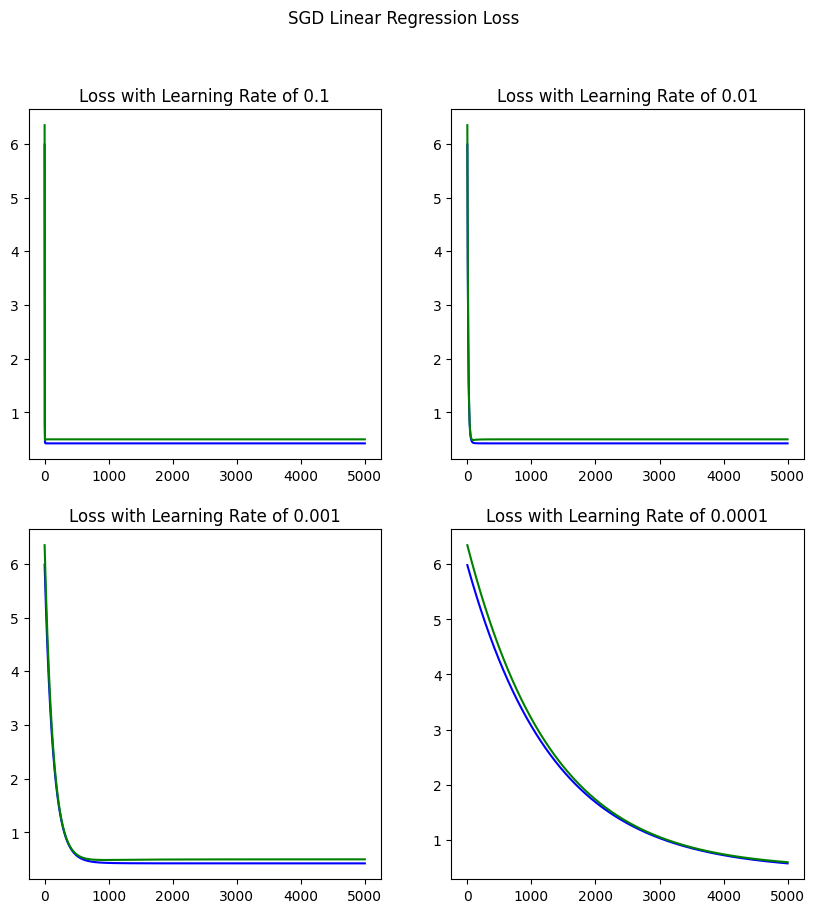

In [73]:
plt.figure(figsize=(10, 10))
plt. suptitle ("SGD Linear Regression Loss")

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='green')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='green')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='green')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss4, color='blue')
plt.plot(SGD_validLoss4, color='green')
plt.title('Loss with Learning Rate of 0.0001')

Text(0.5, 1.0, 'Loss with Learning Rate of 0.0001')

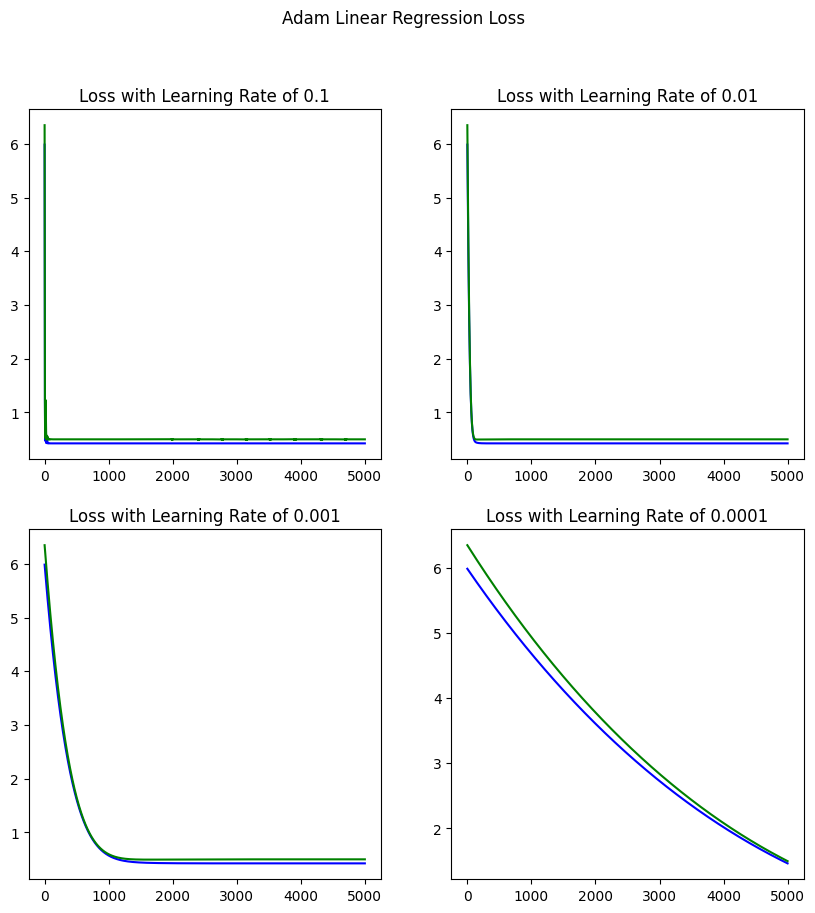

In [74]:
plt.figure(figsize=(10, 10))
plt. suptitle ("Adam Linear Regression Loss")

plt.subplot(2,2,1)
plt.plot(adam_trainLoss1, color='blue')
plt.plot(adam_validLoss1, color='green')
plt.title('Loss with Learning Rate of 0.1')

plt.subplot(2,2,2)
plt.plot(adam_trainLoss2, color='blue')
plt.plot(adam_validLoss2, color='green')
plt.title('Loss with Learning Rate of 0.01')

plt.subplot(2,2,3)
plt.plot(adam_trainLoss3, color='blue')
plt.plot(adam_validLoss3, color='green')
plt.title('Loss with Learning Rate of 0.001')

plt.subplot(2,2,4)
plt.plot(adam_trainLoss4, color='blue')
plt.plot(adam_validLoss4, color='green')
plt.title('Loss with Learning Rate of 0.0001')